<a href="https://colab.research.google.com/github/nobobobo/ml-handson/blob/master/categorize_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Categorize Iris using scikit-learn

## Datasets Overview

### install packages

In [6]:
# install scikit-learn

!pip install -U scikit-learn

# import 
import sklearn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)


### load datasets

In [0]:
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()

In [8]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### take a look at datasets

In [9]:
# print row data 
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [10]:
# view in pandas
import pandas as pd

pd.DataFrame(iris.data, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# take a look at the first feature

first_one_feature = iris.data[:, :1]
pd.DataFrame(first_one_feature, columns= iris.feature_names[:1])

,sepal length (cm)
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [12]:
# print target data 

teacher_labels = iris.target
print(teacher_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### visualize the dataset

Use first two features (sepal length & sepal width) and target

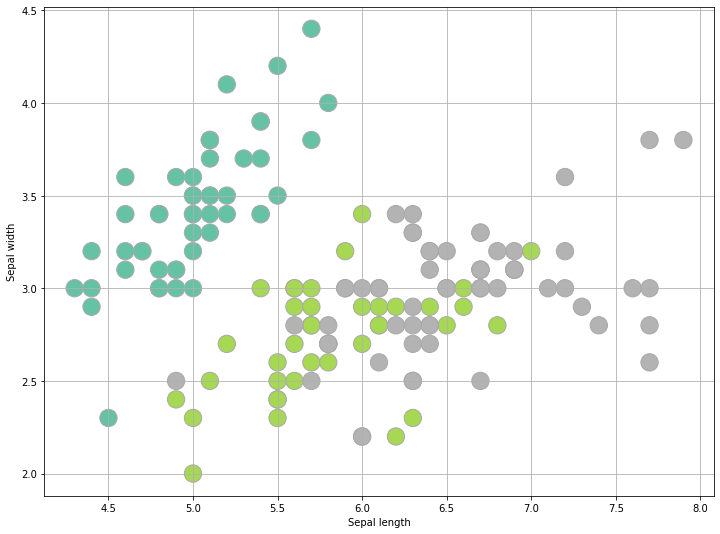

In [13]:
all_features = iris.data

# x: sepal_length, y: sepal width
x_min, x_max = all_features[:,0].min(), all_features[:,0].max()
y_min, y_max = all_features[:,1].min(), all_features[:,1].max()

plt.figure(2, figsize=(12,9))
plt.clf()

plt.scatter(all_features[:,0], all_features[:,1], s=300,
            c=teacher_labels, cmap=plt.cm.Set2,
            edgecolor = 'darkgray')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.grid(True)

Use the third & fourth features

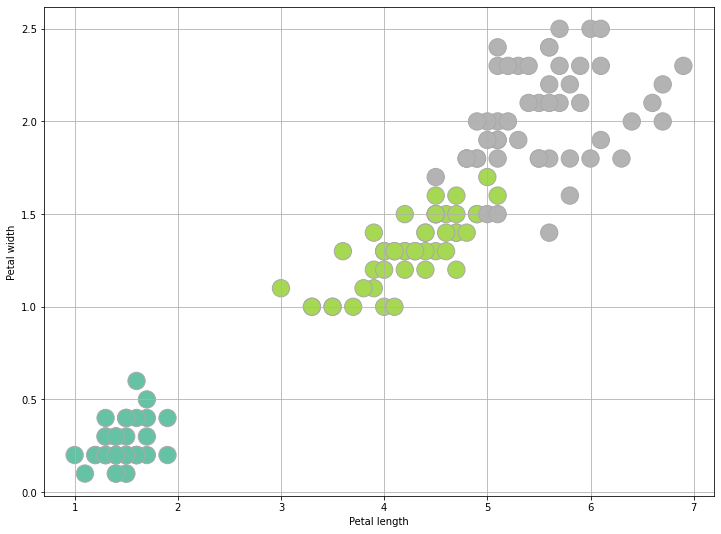

In [14]:
# x: Petal_length, y: petal width
x_min, x_max = all_features[:,2].min(), all_features[:,2].max()
y_min, y_max = all_features[:,3].min(), all_features[:,3].max()

plt.figure(2, figsize=(12,9))
plt.clf()

plt.scatter(all_features[:,2], all_features[:,3], s=300,
            c=teacher_labels, cmap=plt.cm.Set2,
            edgecolor = 'darkgray')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.grid(True)

Visualize reduced features By PCA

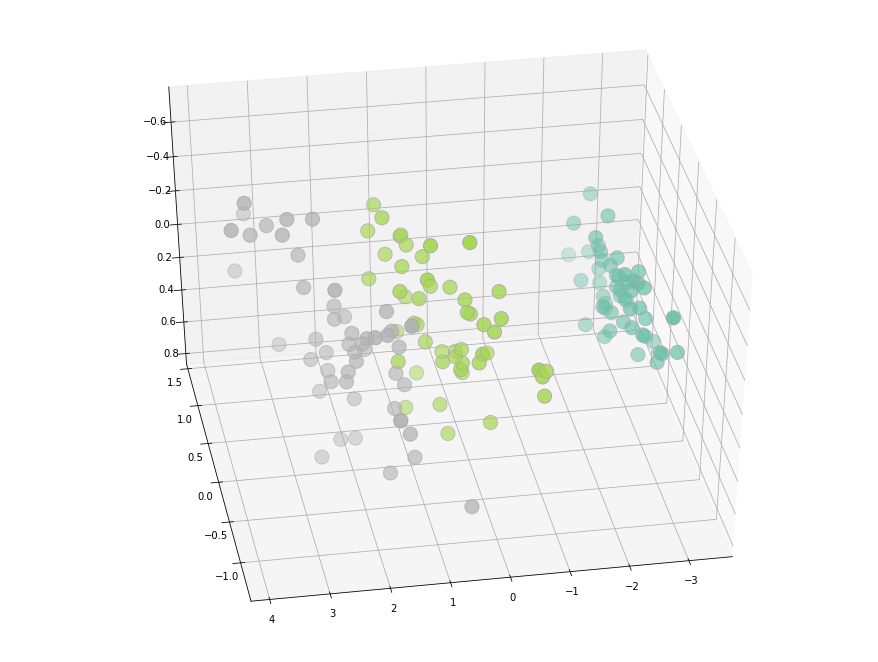

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(12,9))
ax = Axes3D(fig, elev=-140, azim=100)

# reduce features to 3 dims
reduced_features = PCA(n_components=3).fit_transform(all_features)

ax.scatter(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2],
           c=teacher_labels, cmap=plt.cm.Set2, edgecolor= "darkgray", s=200)
plt.show()

## Fitting a model using SVC

###import packages and datasets

In [0]:
from sklearn.svm import SVC

import numpy as np 
import sklearn.datasets as datasets 
import matplotlib.pyplot as plt

In [0]:
iris = datasets.load_iris()

first_two_features = iris.data[:, [0,1]]
teacher_labels = iris.target

### Split Data to categorize iris setosa (0) and iris versicolor (1)

In [0]:
first_two_features = first_two_features[teacher_labels != 2]
teacher_labels = teacher_labels[teacher_labels != 2]

### Use SVC (Support Vector Classifier) to fit data

In [19]:
# create model and fit data
model = SVC(C=1.0, kernel='linear')

model.fit(first_two_features, teacher_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
# Print boudarie line's coef and intercept

print(model.coef_)
print(model.intercept_)

[[ 2.22720466 -2.24959915]]
[-4.9417852]


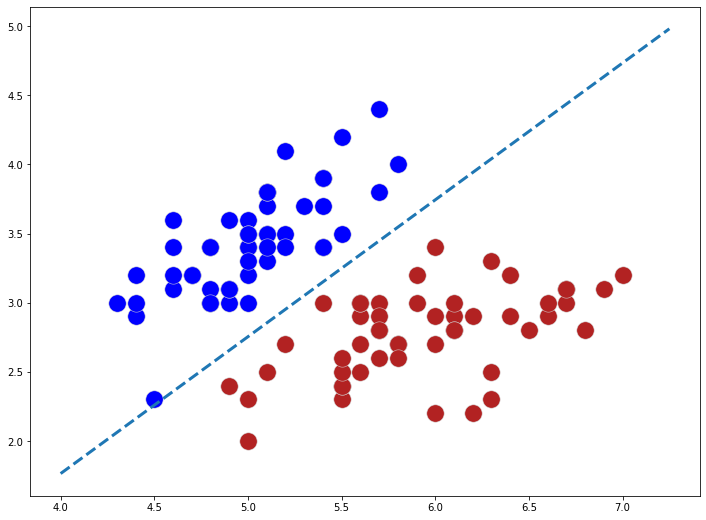

In [26]:
# plot boundary 

fix, ax = plt.subplots(figsize = (12,9))

setosa = first_two_features[teacher_labels == 0]
versicolor = first_two_features[teacher_labels == 1]

plt.scatter(setosa[:, 0], setosa[:,1], s=300, 
            c='blue', linewidths=0.5, edgecolors='lightgray')

plt.scatter(versicolor[:, 0], versicolor[:,1], s=300, c='firebrick',
            linewidths=0.5, edgecolors='lightgray')

Xi = np.linspace(4, 7.25)
Y = -model.coef_[0][0] / model.coef_[0][1] * Xi - model.intercept_ / model.coef_[0][1]

ax.plot(Xi, Y, linestyle ='dashed', linewidth=3)

plt.show()

## Fitting a model and cross validating

### use the last two features and split the data into train & test data

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

last_two_features = iris.data[:, [2,3]]
teacher_labels = iris.target

# shuffle and split data 

train_features, test_features, train_teacher_labels, test_teacher_labels = train_test_split(last_two_features, teacher_labels,
                 test_size = 0.2, random_state=None)

# Centering and scaling data using train_features data
sc = StandardScaler()
sc.fit(train_features)

train_features_std = sc.transform(train_features)
test_features_std = sc.transform(test_features)


# fit a new SVC model 

from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=None)

model.fit(train_features_std, train_teacher_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Check accuracy

In [37]:
# Accuracy for train data set

from sklearn.metrics import accuracy_score

predict_train = model.predict(train_features_std)

accuracy_train = accuracy_score(train_teacher_labels, predict_train)

print('Acccuracy for train data set: %.2f' % accuracy_train)

Acccuracy for train data set: 0.96


In [38]:
# Accuracy for test data set

predict_test = model.predict(test_features_std)

accuracy_test = accuracy_score(test_teacher_labels, predict_test)

print('Acccuracy for test data set: %.2f' % accuracy_test)

Acccuracy for test data set: 0.97
